# Imports

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pprint
pp = pprint.PrettyPrinter(indent=4)

import acctrack.utils.ctd2021_data as data_helper
from acctrack.io.athena_raw_data import AthenaRawDataReader
from acctrack.tools.compare_tracking_algs import TrackAlgComparator


# Compare GNN with CKF

In [3]:
run_number = 242020
event_number = 24723
evtid = data_helper.find_event_index(event_number)


In [13]:
gnn_basedir = "/media/DataOcean/projects/tracking/integrateToAthena/run_21.9.26/RunOneEventForDebuging/GNN_noRemoval"
gnn_reader = AthenaRawDataReader(gnn_basedir, overwrite=False, name="GNN")
gnn_reader.read(evtid)

Total 1 events in directory: /media/DataOcean/projects/tracking/integrateToAthena/run_21.9.26/RunOneEventForDebuging/GNN_noRemoval


True

In [14]:
gnn_reader.match_to_truth()

All matched to truth GNN:  1816 2422 0.749793559042114


,trkid,num_matched,subevent,barcode,true_pixel_hits,true_sct_hits,reco_pixel_hits,reco_sct_hits,common_pixel_hits,common_sct_hits,particle_id
0,0,1,5602,200119,5,12,0,6,0,6,56020200119
1,1,1,5514,503,21,0,3,0,3,0,55140000503
2,2,1,5586,280,20,0,4,0,4,0,55860000280
5,4,1,5512,404,19,0,4,0,4,0,55120000404
6,5,1,5531,58,12,0,4,0,4,0,55310000058
...,...,...,...,...,...,...,...,...,...,...,...
2417,2007,1,5529,1591,20,0,20,0,20,0,55290001591
2418,2008,1,5655,1668,9,0,9,0,9,0,56550001668
2419,2009,1,5621,553,14,0,14,0,14,0,56210000553
2420,2010,1,5630,1283,13,0,13,0,13,0,56300001283


In [15]:
gnn_reader.tracks_matched_to_truth[gnn_reader.tracks_matched_to_truth.trkid == 29]

,trkid,num_matched,subevent,barcode,true_pixel_hits,true_sct_hits,reco_pixel_hits,reco_sct_hits,common_pixel_hits,common_sct_hits,particle_id
31,29,2,5701,1000539,14,0,14,0,14,0,57011000539


In [16]:
gnn_reader.particles[gnn_reader.particles.particle_id == "57011000539"]

,particle_id,subevent,barcode,px,py,pz,pt,eta,vx,vy,vz,radius,status,charge,pdgId,pass,vProdNIn,vProdNOut,vProdStatus,vProdBarcode
199700,57011000539,5701,1000539,2039.01,-1291.5,-1291.5,2413.61,2.88679,118.696,-78.6855,1326.81,142.408,1,1.0,211,NO,1,1,1111,-200236


In [24]:
gnn_reader.clusters.columns

Index(['cluster_id', 'hardware', 'cluster_x', 'cluster_y', 'cluster_z',
       'barrel_endcap', 'layer_disk', 'eta_module', 'phi_module', 'side',
       'cell_count', 'cell_val', 'leta', 'lphi', 'lx', 'ly', 'lz', 'geta',
       'gphi', 'eta_angle', 'phi_angle', 'norm_x', 'norm_y', 'norm_z',
       'particle_id'],
      dtype='object')

In [22]:
gnn_reader.clusters[gnn_reader.clusters.particle_id == 57011000539]

,cluster_id,hardware,cluster_x,cluster_y,cluster_z,barrel_endcap,layer_disk,eta_module,phi_module,side,...,ly,lz,geta,gphi,eta_angle,phi_angle,norm_x,norm_y,norm_z,particle_id


In [9]:

ckf_basedir = "/media/DataOcean/projects/tracking/integrateToAthena/run_21.9.26/RunOneEventForDebuging/CKF_noRemoval"
ckf_reader = AthenaRawDataReader(ckf_basedir, overwrite=False, name="CKF")
ckf_reader.read(evtid)


Total 1 events in directory: /media/DataOcean/projects/tracking/integrateToAthena/run_21.9.26/RunOneEventForDebuging/CKF_noRemoval


True

In [5]:
print("GNN") 
print(gnn_reader.detailed_matching['num_matched'].value_counts())
print("CKF")
print(ckf_reader.detailed_matching['num_matched'].value_counts())

GNN
1    2171
2     232
3      18
4       1
Name: num_matched, dtype: int64
CKF
1    2215
2     204
3      20
4       2
7       1
Name: num_matched, dtype: int64


In [6]:
compare_gnn_ckf = TrackAlgComparator(gnn_reader, ckf_reader)

## Common tracks

2012 GNN tracks compared to 2077 CKF tracks.
Require min_num_clusters = 5 only for GNN tracks.
Total # of GNN tracks: 2012. After filtering, # of GNN tracks: 1821 (90.507%)
Matched: 771, 1821, 0.4234
GNN is a subset: 428, 1821, 0.2350
CKF is a subset: 194, 1821, 0.1065
Disjoint:  258, 1821, 0.1417


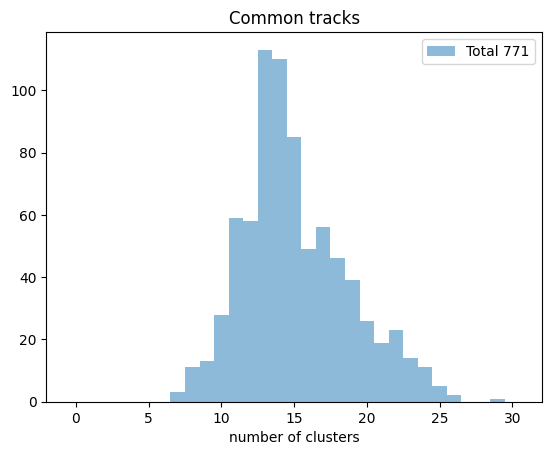

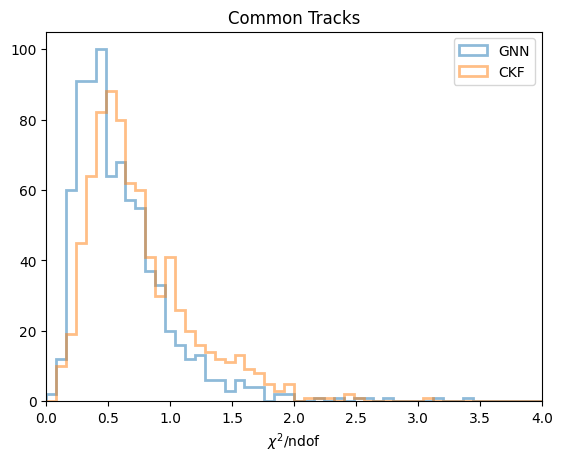

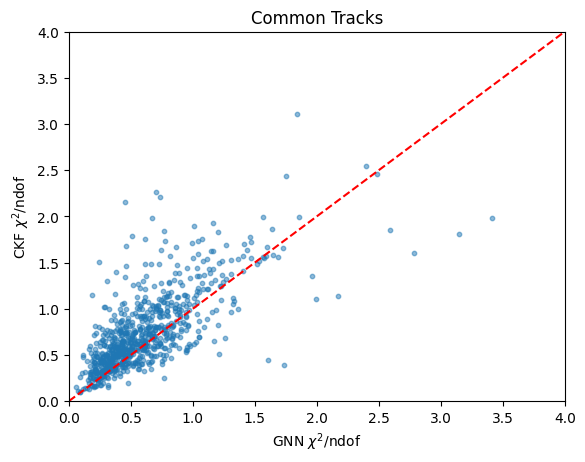

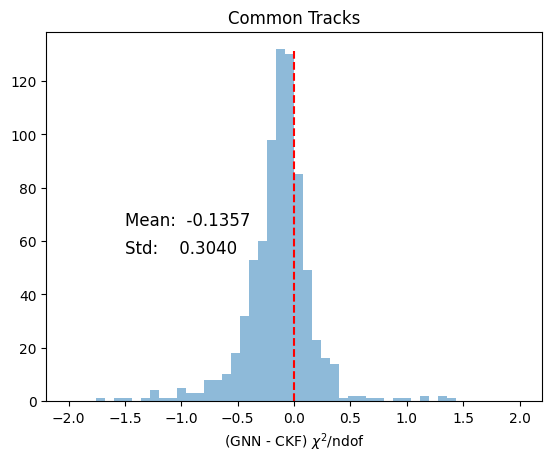

In [7]:
gnn_chi2, ckf_chi2 = compare_gnn_ckf.plot_common_tracks()

## Disjoint tracks

All matched to truth GNN:  1816 2422 0.749793559042114
All matched to truth CKF:  1876 2442 0.7682227682227682
2077 CKF tracks compared to 2012 GNN tracks.
Require min_num_clusters = 5 only for CKF tracks.
Total # of CKF tracks: 2077. After filtering, # of CKF tracks: 2077 (100.000%)
Matched: 771, 2077, 0.3712
CKF is a subset: 194, 2077, 0.0934
GNN is a subset: 449, 2077, 0.2162
Disjoint:  491, 2077, 0.2364
2012 GNN tracks compared to 2077 CKF tracks.
Require min_num_clusters = 5 only for GNN tracks.
Total # of GNN tracks: 2012. After filtering, # of GNN tracks: 1821 (90.507%)
Matched: 771, 1821, 0.4234
GNN is a subset: 428, 1821, 0.2350
CKF is a subset: 194, 1821, 0.1065
Disjoint:  258, 1821, 0.1417


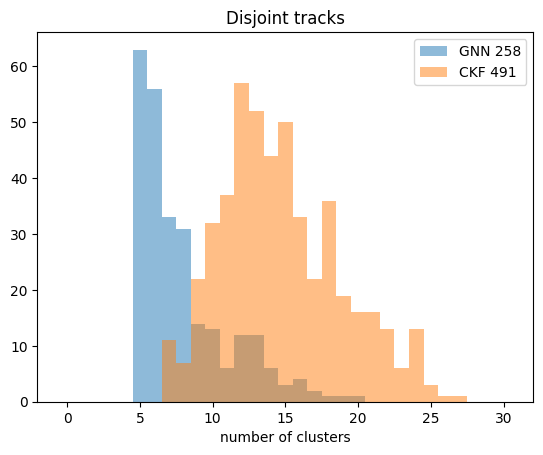

Number of good disjoint GNN tracks: 195 / 258
Number of good disjoint CKF tracks: 419 / 491


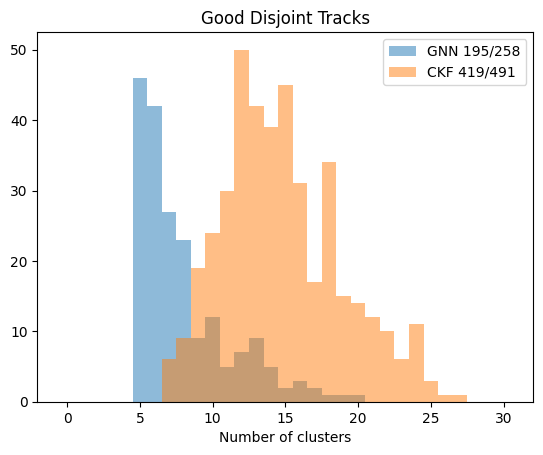

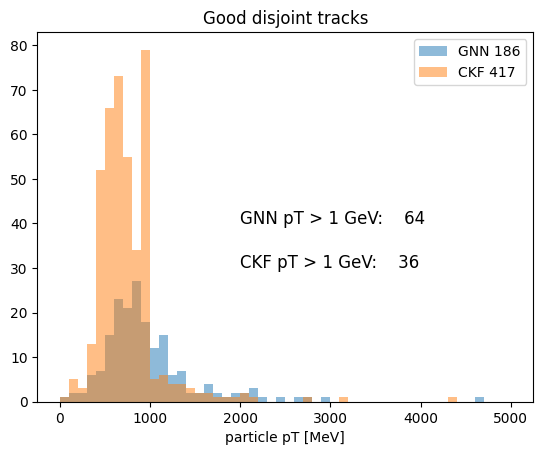

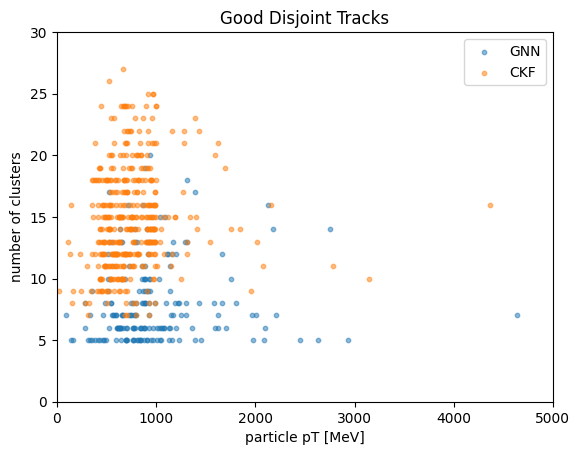

In [8]:
results = compare_gnn_ckf.plot_disjoint_tracks()
gnn_good_disjoints, ckf_good_disjoints, gnn_good_disjoints_matched_particles, ckf_good_disjoints_matched_particles = results

### Good Disjoint Tracks from CKF with pT > 1 GeV
There are 36 tracks only found by CKF and matched to true particles with pT > 1 GeV. However, the track contents of those tracks are not used at all by GNN. Let's look at the details of these tracks. 

In [9]:
pt_ckf = ckf_good_disjoints_matched_particles.pt.values

ckf_matched_pids = ckf_good_disjoints_matched_particles[pt_ckf > 1000].particle_id.values
ckf_disjoints_good_match = ckf_good_disjoints[ckf_good_disjoints.particle_id.isin(ckf_matched_pids)]

good_ckf_only_clusters = [ckf_reader.tracks_clusters[x] for x in ckf_disjoints_good_match.trkid.values]
good_ckf_only_clusters = np.array([item for sublist in good_ckf_only_clusters for item in sublist], dtype=int)
good_ckf_only_cluster_info = ckf_reader.clusters[ckf_reader.clusters.cluster_id.isin(good_ckf_only_clusters)]
good_ckf_only_cluster_info = good_ckf_only_cluster_info.assign(
    cluster_r=np.sqrt(good_ckf_only_cluster_info.cluster_x**2 + good_ckf_only_cluster_info.cluster_y**2))


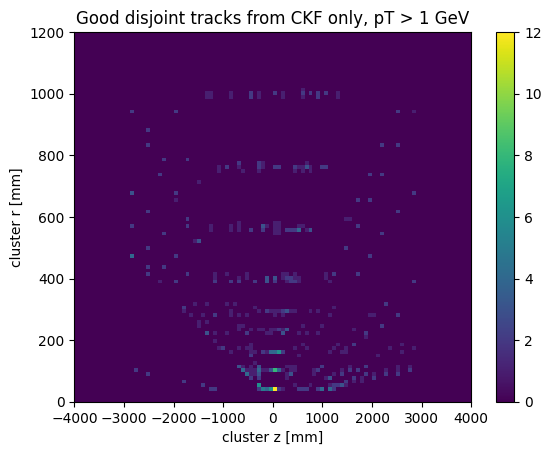

In [10]:
plt.title("Good disjoint tracks from CKF only, pT > 1 GeV")
plt.hist2d(good_ckf_only_cluster_info.cluster_z, good_ckf_only_cluster_info.cluster_r, bins=100, range=((-4000, 4000), (0, 1200)))
plt.xlabel("cluster z [mm]")
plt.ylabel("cluster r [mm]")
plt.colorbar()


In [11]:
print(compare_gnn_ckf.common_track_indices[0])
print(compare_gnn_ckf.common_track_indices[4])
print("{:.6f}, {:.6f}".format(gnn_chi2[0], ckf_chi2[0]))
print("{:.6f}, {:.6f}".format(gnn_chi2[4], ckf_chi2[4]))

(13, [170007, 170083, 170153, 170229, 206124, 206293, 206160, 206332, 206201, 204650, 204743, 204843, 204945], 829)
(17, [168996, 169943, 169073, 170029, 169133, 170099, 170165, 206098, 206139, 206176, 204437, 202819, 204579, 204669, 204768, 204868], 251)
0.458252, 0.405440
0.396159, 0.490726


In [13]:
with open("common_tracks.txt", "w") as f:
    for gnn_common_trkid, gnn_common_clusters, ckf_common_trkid in compare_gnn_ckf.common_track_indices:
        output = ",".join([str(x) for x in gnn_common_clusters])
        output += "\n"
        f.write(output)

## Sanity Check of Common Tracks

Use the GNN setup to fit those common tracks to make sure the fitted $\chi^2$ is the same as the one from GNN or CKF.

Yes, the fitted $\chi^2$ is the same as the one obtained from the GNN setup. Note that, in this case, the inputs are clusters.

In [14]:
common_base_dir = "/media/DataOcean/projects/tracking/integrateToAthena/run_21.9.26/RunOneEventForDebuging/Common_noRemoval"
common_reader = AthenaRawDataReader(common_base_dir, overwrite=False, name="Common")
common_reader.read(event_number=event_number)

Total 1 events in directory: /media/DataOcean/projects/tracking/integrateToAthena/run_21.9.26/RunOneEventForDebuging/Common_noRemoval


In [15]:
common_chi2 = common_reader.true_tracks.chi2 / common_reader.true_tracks.nDoF

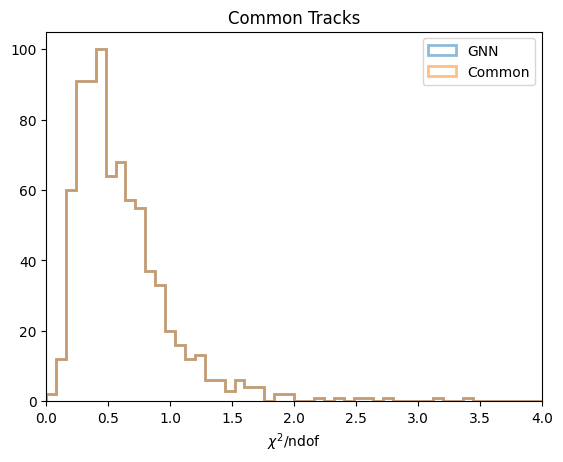

In [16]:
plt.title("Common Tracks")
chi2_hist_config = dict(bins=50, range=(0, 4), alpha=0.5, histtype='step', lw=2)
plt.hist(gnn_chi2, **chi2_hist_config, label="GNN")
plt.hist(common_chi2, **chi2_hist_config, label="Common")
plt.xlim(0, 4)
plt.xlabel("$\chi^2$/ndof")
plt.legend()

# Detailed Comparison of Two Common Tracks

Turn on the debug level printout for the Global $\chi^2$ Fitter and look into the fitting results for the common tracks.

In [19]:
gxf_debug_ckf_fname = "/media/DataOcean/projects/tracking/integrateToAthena/run_21.9.26/RunOneEventForDebuging/TwoCommonEventsDebug/CKF/log.txt"
gxf_debug_gnn_fname = "/media/DataOcean/projects/tracking/integrateToAthena/run_21.9.26/RunOneEventForDebuging/TwoCommonEventsDebug/GNN/log.txt"
gnn_trkids = [0, 1]
ckf_trkids = [0] + [compare_gnn_ckf.common_track_indices[x][2] for x in [0, 4]]
ckf_trkids

[0, 829, 251]

In [ ]:
def extract_fitting_info(fname, trkids):
    """Get the printout of the Global Fitter for all track ids.
    Assume there is one event. 
    """
    output = dict((x, []) for x in trkids)
    prefix = "ToolSvc.InDetTrackFitter                  DEBUG "
    start_line = prefix + "--> entering GlobalChi2Fitter::fit(Meas'BaseSet,,)"
    with open(fname, "r") as f:
        do_start_save = False
        this_trk_id = -1

        start_count_down = False
        count_down = 0
        max_addition = 11
        for line in f.readlines():
            if line.startswith(start_line):
                this_trk_id += 1
                if this_trk_id in trkids:
                    do_start_save = True
                else:
                    do_start_save = False
                continue
                    
            if do_start_save:
                line = line.replace(prefix, "")
                output[this_trk_id].append(line)
                if "Final perigee:  * TrackParameters on Surface" in line:
                    start_count_down = True
                if start_count_down:
                    count_down += 1
                    if count_down > max_addition:
                        do_start_save = False
                        start_count_down = False
                        count_down = 0
    print(f"Found {this_trk_id+1} tracks in {fname}")
    return output

In [ ]:
gnn_info = extract_fitting_info(gxf_debug_gnn_fname, gnn_trkids)
ckf_info = extract_fitting_info(gxf_debug_ckf_fname, ckf_trkids)

Found 2 tracks in /media/DataOcean/projects/tracking/integrateToAthena/run_21.9.26/RunOneEventForDebuging/TwoCommonEventsDebug/GNN/log.txt
Found 2634 tracks in /media/DataOcean/projects/tracking/integrateToAthena/run_21.9.26/RunOneEventForDebuging/TwoCommonEventsDebug/CKF/log.txt


In [ ]:
np.unique(np.random.randint(0, 100, size=50)).shape

(41,)

The Global chi2 fitter fitted 2634 CKF tracks but only 2077 of them are accepted. The track indices are completely messed up. Fortunately, the first track is accepted. We could look at that one to see if the input cluster positions are the same. The answer is that they are not exactly the same. 

In [ ]:
print(gnn_info[0])

['#0 Pixel hit pos=(36.0077,-13.0403,902) \n', '#1 Pixel hit pos=(40.2732,-14.6365,1010) \n', '#2 Pixel hit pos=(44.7882,-16.3664,1125) \n', '#3 Pixel hit pos=(49.9146,-18.2949,1255) \n', '#4 Pixel hit pos=(58.8138,-21.7469,1482) \n', '#5 Pixel hit pos=(58.9544,-21.79,1486) \n', '#6 Pixel hit pos=(64.9895,-24.1343,1639) \n', '#7 Pixel hit pos=(65.1288,-24.1737,1643) \n', '#8 Pixel hit pos=(71.0157,-26.4864,1793) \n', '#9 Pixel hit pos=(82.0925,-30.9057,2076) \n', '#10 Pixel hit pos=(89.8077,-34.0203,2274) \n', '#11 Pixel hit pos=(98.2701,-37.4239,2491) \n', '#12 Pixel hit pos=(107.632,-41.202,2732) \n', 'start param:  * TrackParameters on Surface\n', ' * loc1  : -1.2750299\n', ' * loc2  : -7.8750000\n', ' * phi   : -0.3621234\n', ' * Theta : 0.0420639\n', ' * q/p   : 0.0000421\n', ' * corresponding global parameters:\n', ' *    position  (x,  y,  z ) = (36.0076822, -13.0402510, 902.0000000)\n', ' *    momentum  (px, py, pz) = (935.1467115, -354.2606779, 23759.3106586)\n', ' pos:  36.00

In [ ]:
print(ckf_trkids[1], ckf_info[ckf_trkids[1]])

829 ['#0 Pixel hit pos=(36.025703,14.962119,212.110500) \n', '#1 Pixel hit pos=(45.564456,19.299781,263.000000) \n', '#2 Pixel hit pos=(49.866576,21.275928,286.000000) \n', '#3 Pixel hit pos=(75.469950,33.327657,423.000000) \n', '#4 Pixel hit pos=(83.430532,37.223258,466.000000) \n', '#5 Pixel hit pos=(84.182920,37.578145,470.000000) \n', '#6 Pixel hit pos=(94.372428,42.623828,525.000000) \n', '#7 Pixel hit pos=(105.267266,48.161552,584.000000) \n', '#8 Pixel hit pos=(153.681877,73.853398,847.460103) \n', '#9 Pixel hit pos=(206.869258,104.835172,1142.997500) \n', '#10 Pixel hit pos=(255.232222,135.678819,1419.002500) \n', '#11 SCT endcap hit pos=(348.341966,201.615774,1956.251000) \n', '#12 SCT endcap hit pos=(348.239710,201.792378,1962.749000) \n', '#13 SCT endcap hit pos=(417.775522,251.087369,2241.251000) \n', '#14 SCT endcap hit pos=(417.179637,252.076243,2247.749000) \n', '#15 SCT endcap hit pos=(453.296931,282.289923,2536.251000) \n', '#16 SCT endcap hit pos=(452.943254,282.85713

In [ ]:
print(ckf_info[0])

['#0 Pixel hit pos=(36.625,-6.575,-259) \n', '#1 Pixel hit pos=(37.2174,-6.65135,-263) \n', '#2 Pixel hit pos=(40.075,-7.125,-282) \n', '#3 Pixel hit pos=(40.6637,-7.2149,-286) \n', '#4 Pixel hit pos=(44.425,-7.825,-311) \n', '#5 Pixel hit pos=(45.0291,-7.92776,-315) \n', '#6 Pixel hit pos=(49.0537,-8.525,-342) \n', '#7 Pixel hit pos=(49.6663,-8.61584,-346) \n', '#8 Pixel hit pos=(54.5964,-9.35357,-379) \n', '#9 Pixel hit pos=(55.2076,-9.44749,-383) \n', '#10 Pixel hit pos=(84.775,-13.375,-580) \n', '#11 Pixel hit pos=(85.4068,-13.4242,-584) \n', '#12 Pixel hit pos=(95.025,-14.525,-648) \n', '#13 Pixel hit pos=(95.6238,-14.5884,-652) \n', '#14 Pixel hit pos=(105.903,-15.675,-720) \n', '#15 Pixel hit pos=(106.51,-15.7072,-724) \n', '#16 Pixel hit pos=(118.525,-16.9039,-803) \n', '#17 Pixel hit pos=(154.989,-19.1853,-1040.31) \n', '#18 Pixel hit pos=(156.273,-19.2606,-1048.62) \n', '#19 Pixel hit pos=(172.314,-19.8446,-1153) \n', '#20 Pixel hit pos=(188.224,-20.3366,-1257) \n', '#21 Pixe

In [ ]:
ckf_reader.true_tracks.iloc[0]

trkid                    0
fitter                   5
material                 3
nDoF                    47
chi2               27.0485
charge                  -1
x                 0.033928
y                 0.166654
z                 -13.3596
px              578.323975
py             -117.737999
pz            -3895.590088
mot                     27
oot                      0
subevent              5564
barcode                420
probability            1.0
pdgId                 -211
status                   1
particle_id    55640000420
pt              590.187134
Name: 0, dtype: object

In [ ]:
# `isin` does not preserve the order of the elements in the array. 
ckf_clusters = ckf_reader.clusters
ckf_clusters.set_index("cluster_id").loc[ckf_reader.tracks[0]].reset_index()

,cluster_id,hardware,cluster_x,cluster_y,cluster_z,barrel_endcap,layer_disk,eta_module,phi_module,side,...,ly,lz,geta,gphi,eta_angle,phi_angle,norm_x,norm_y,norm_z,particle_id
0,8916,PIXEL,36.625000,-6.575000,-259.000000,-2,0,0,9,0,...,0.050000,0.15,1.496610,0.785398,1.249050,1.249050,0,0,-1,55640000420
1,7832,PIXEL,37.216202,-6.650970,-263.000000,-2,0,0,8,0,...,0.050000,0.15,1.103590,0.792989,1.249050,0.982794,0,0,-1,55640000420
2,8980,PIXEL,40.075001,-7.125000,-282.000000,-2,0,1,9,0,...,0.050000,0.15,1.496610,0.785398,1.249050,1.249050,0,0,-1,55640000420
3,7906,PIXEL,40.670101,-7.212420,-286.000000,-2,0,1,8,0,...,0.100000,0.15,0.923623,0.471239,0.982794,0.982794,0,0,-1,55640000420
4,9044,PIXEL,44.424999,-7.825000,-311.000000,-2,0,2,9,0,...,0.050000,0.15,1.496610,0.785398,1.249050,1.249050,0,0,-1,55640000420
5,7985,PIXEL,45.029099,-7.927760,-315.000000,-2,0,2,8,0,...,0.050000,0.15,1.496610,0.471239,1.249050,1.249050,0,0,-1,55640000420
6,9102,PIXEL,49.049999,-8.525000,-342.000000,-2,0,3,9,0,...,0.050000,0.15,1.103590,1.107150,1.249050,0.982794,0,0,-1,55640000420
7,8074,PIXEL,49.667198,-8.619890,-346.000000,-2,0,3,8,0,...,0.100000,0.15,0.923623,0.471239,0.982794,0.982794,0,0,-1,55640000420
8,9156,PIXEL,54.591702,-9.358330,-379.000000,-2,0,4,9,0,...,0.100000,0.15,0.923623,0.785398,0.982794,0.982794,0,0,-1,55640000420
9,8141,PIXEL,55.207600,-9.447490,-383.000000,-2,0,4,8,0,...,0.050000,0.15,1.496610,0.471239,1.249050,1.249050,0,0,-1,55640000420


In [ ]:
print("{:.6f}, {:.6f}".format(gnn_chi2[0], ckf_chi2[0]))
df

0.458252, 0.405440


NameError: name 'df' is not defined

# Ambiguity Processor

The AmbiguityProcessor is used to resolve the ambiguity tracks for the CKF. It can *ForceRefit* and *RefitPrds*. *ForceRefit* means the track candidates are refitted even if they are not ambiguous. *RefitPrds* means the track candidates are refitted using the PRD positions instead of the original position.

Changing the two options also changes the number of accepted tracks.

## Impact on CKF Tracks

Without refitting the prepared raw data. 

In [20]:
ckf_noRefitPrds_base_dir = "/media/DataOcean/projects/tracking/integrateToAthena/run_21.9.26/RunOneEventForDebuging/CKF_noRemoval_noReFitPrds"
ckf_noRefitPrds_reader = AthenaRawDataReader(ckf_noRefitPrds_base_dir, overwrite=False, name="CKF_noRefitPrds")
ckf_noRefitPrds_reader.read(event_number=event_number)

Total 1 events in directory: /media/DataOcean/projects/tracking/integrateToAthena/run_21.9.26/RunOneEventForDebuging/CKF_noRemoval_noReFitPrds


In [21]:
from acctrack.tools.compare_tracking_algs import TrackAlgComparator
comparator = TrackAlgComparator(ckf_noRefitPrds_reader, ckf_reader)

2083 CKF_noRefitPrds tracks compared to 2077 CKF tracks.
Require min_num_clusters = 5 only for CKF_noRefitPrds tracks.
Total # of CKF_noRefitPrds tracks: 2083. After filtering, # of CKF_noRefitPrds tracks: 2083 (100.000%)
Matched: 1881, 2083, 0.9030
CKF_noRefitPrds is a subset: 1, 2083, 0.0005
CKF is a subset: 139, 2083, 0.0667
Disjoint:  18, 2083, 0.0086


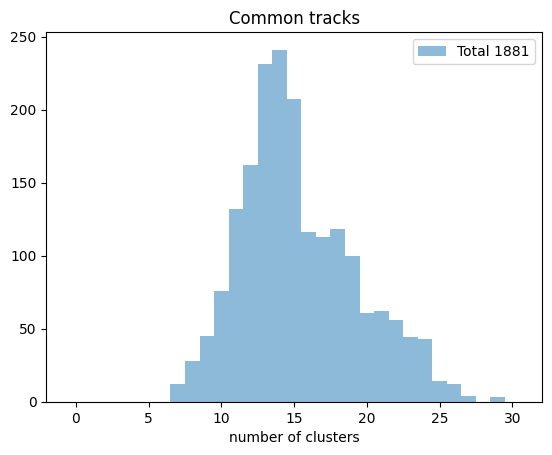

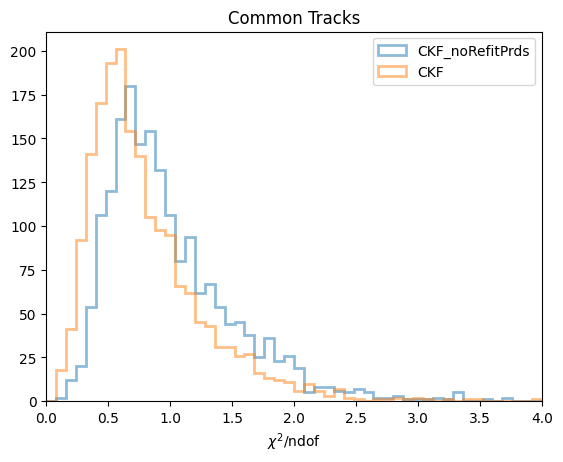

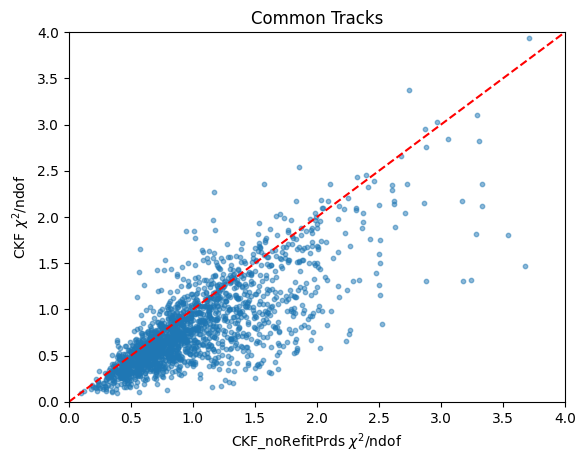

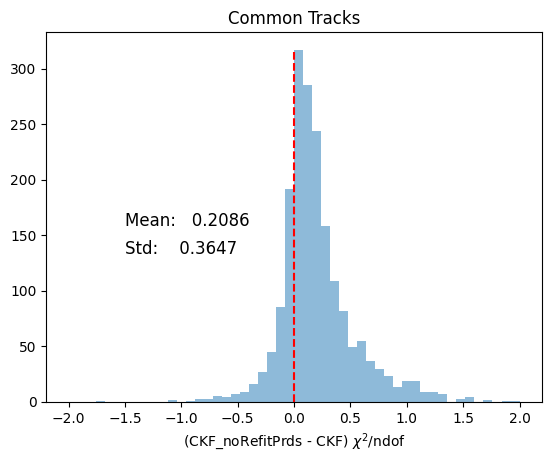

In [22]:
_ = comparator.plot_common_tracks()

## Impact on GNN Tracks

In [5]:
gnn_withAmbig_base_dir = "/media/DataOcean/projects/tracking/integrateToAthena/run_21.9.26/RunOneEventForDebuging/GNN_noRemoval_withAmbiguityResolvor"
gnn_withAmbig_reader = AthenaRawDataReader(gnn_withAmbig_base_dir, overwrite=False, name="GNN with Ambiguity Resolution")
gnn_withAmbig_reader.read(evtid)

Total 1 events in directory: /media/DataOcean/projects/tracking/integrateToAthena/run_21.9.26/RunOneEventForDebuging/GNN_noRemoval_withAmbiguityResolvor


True

### Compare GNN tracks with or without Ambiguity Processor

In [8]:
gnn_compare_ambig = TrackAlgComparator(gnn_reader, gnn_withAmbig_reader, min_reco_clusters=0)

2012 GNN tracks compared to 1474 GNN with Ambiguity Resolution tracks.
Require min_num_clusters = 0 only for GNN tracks.
Total # of GNN tracks: 2012. After filtering, # of GNN tracks: 2012 (100.000%)
Matched: 1473, 2012, 0.7321
GNN is a subset: 0, 2012, 0.0000
GNN with Ambiguity Resolution is a subset: 1, 2012, 0.0005
Disjoint:  537, 2012, 0.2669


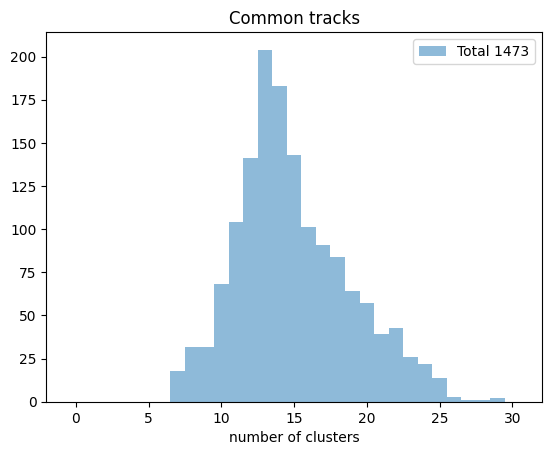

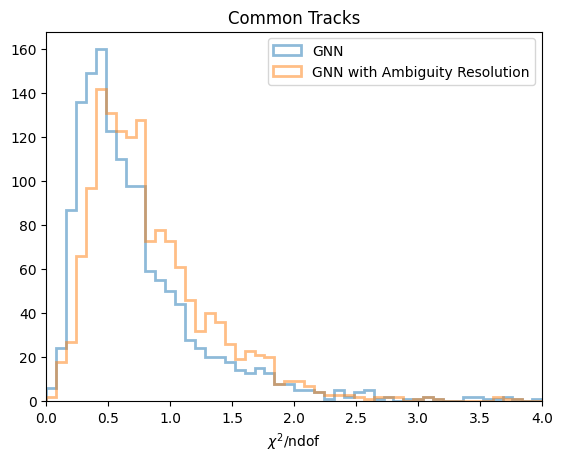

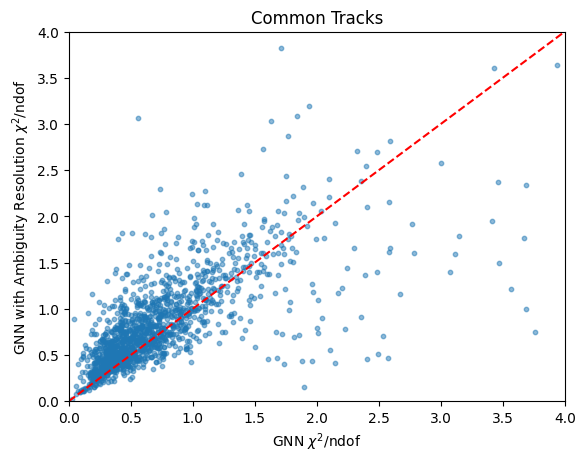

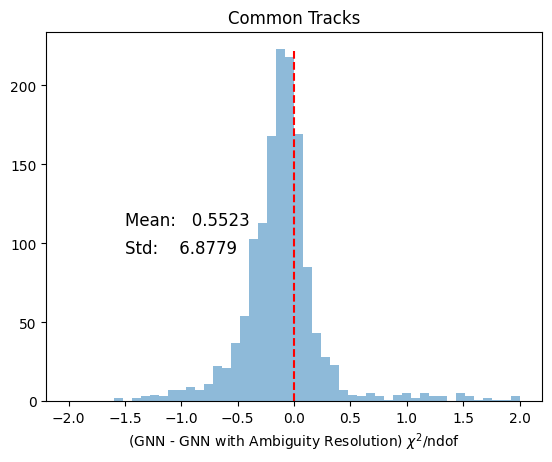

In [9]:
_ = gnn_compare_ambig.plot_common_tracks()

All matched to truth GNN:  1816 2422 0.749793559042114
All matched to truth GNN with Ambiguity Resolution:  1430 1612 0.8870967741935484
1474 GNN with Ambiguity Resolution tracks compared to 2012 GNN tracks.
Require min_num_clusters = 0 only for GNN with Ambiguity Resolution tracks.
Total # of GNN with Ambiguity Resolution tracks: 1474. After filtering, # of GNN with Ambiguity Resolution tracks: 1474 (100.000%)
Matched: 1473, 1474, 0.9993
GNN with Ambiguity Resolution is a subset: 1, 1474, 0.0007
GNN is a subset: 0, 1474, 0.0000
Disjoint:  0, 1474, 0.0000
2012 GNN tracks compared to 1474 GNN with Ambiguity Resolution tracks.
Require min_num_clusters = 0 only for GNN tracks.
Total # of GNN tracks: 2012. After filtering, # of GNN tracks: 2012 (100.000%)
Matched: 1473, 2012, 0.7321
GNN is a subset: 0, 2012, 0.0000
GNN with Ambiguity Resolution is a subset: 1, 2012, 0.0005
Disjoint:  537, 2012, 0.2669


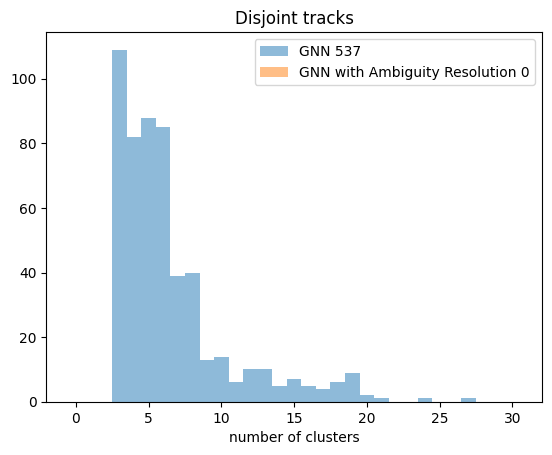

Number of good disjoint GNN tracks: 409 / 537
Number of good disjoint GNN with Ambiguity Resolution tracks: 0 / 0


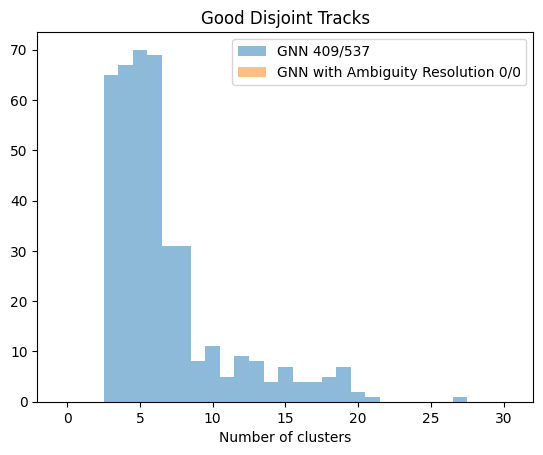

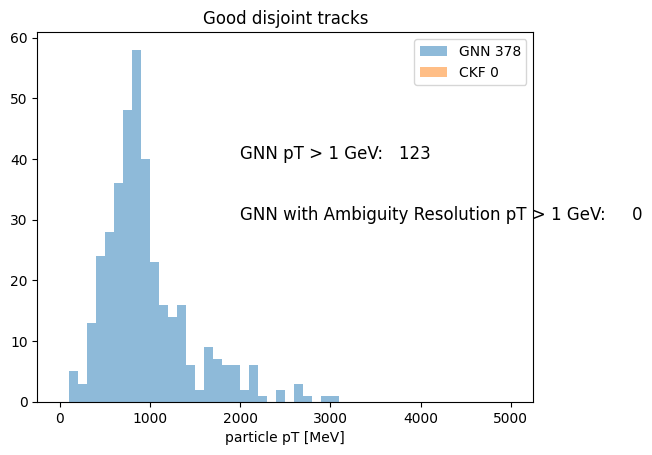

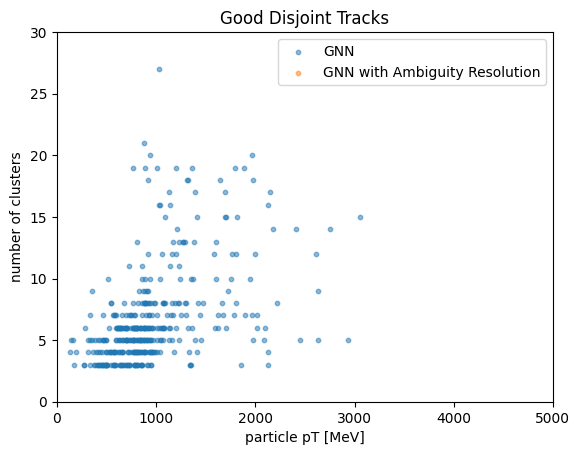

In [23]:
_ = gnn_compare_ambig.plot_disjoint_tracks()

In [10]:
ar_common_tracks, ar_unmatched_tracks, ar_disjoint_tracks = gnn_compare_ambig.compare_track_contents()

In [33]:
gnn_withAmbig_reader.true_tracks

,trkid,fitter,material,nDoF,chi2,charge,x,y,z,px,...,pz,mot,oot,subevent,barcode,probability,pdgId,status,particle_id,pt
0,0,5,3,47,14.417900,-1,0.112960,0.053990,64.655800,-524.421997,...,-12446.900391,26,0,5654,890,1.0,-211,1,56540000890,1216.095459
1,1,5,3,41,38.153400,-1,0.017689,-0.002310,100.602997,216.731003,...,-17200.900391,23,0,5556,877,1.0,-211,1,55560000877,1673.592651
2,2,5,3,45,35.938301,-1,0.049969,-0.102803,37.950802,1509.599976,...,8262.299805,29,0,5515,762,1.0,-211,1,55150000762,1678.479736
3,3,5,3,39,10.945700,1,-0.058681,-0.115437,-16.623199,-2110.370117,...,42913.800781,22,0,5573,174,1.0,211,1,55730000174,2367.386475
4,4,5,3,39,14.254300,1,0.011485,-0.011207,15.420000,706.413025,...,-8090.330078,22,0,0,933,1.0,2212,1,00000933,1011.466736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,1469,5,3,9,2.682600,1,-0.162688,-0.126533,-54.943199,1277.030029,...,-2307.179932,9,0,5593,461,1.0,211,1,55930000461,2080.081787
1470,1470,5,3,9,6.757400,-1,0.026505,-0.002965,-75.188103,-126.134003,...,227.354004,10,0,5674,757,1.0,-211,1,56740000757,1134.434082
1471,1471,5,3,9,4.159420,1,-0.238447,-0.010817,48.381100,-82.464600,...,-102.680000,11,0,5608,194,1.0,211,1,56080000194,1819.629639
1472,1472,5,3,9,7.176610,-1,0.019487,0.250485,-48.402901,-1339.219971,...,257.897003,10,0,5528,836,1.0,-321,1,55280000836,1343.266602


In [12]:
disjoint_track_indices = np.array([x[0] for x in ar_disjoint_tracks], dtype=int)

In [13]:
disjoints = gnn_reader.true_tracks[gnn_reader.true_tracks.trkid.isin(disjoint_track_indices)]

In [14]:
disjoints.columns

Index(['trkid', 'fitter', 'material', 'nDoF', 'chi2', 'charge', 'x', 'y', 'z',
       'px', 'py', 'pz', 'mot', 'oot', 'subevent', 'barcode', 'probability',
       'pdgId', 'status', 'particle_id', 'pt'],
      dtype='object')

In [15]:
momentum = np.sqrt(disjoints.px**2 + disjoints.py**2 + disjoints.pz**2)
theta = np.arccos(disjoints.pz / momentum)
eta = -np.log(np.tan(theta/2))
chi2ndof = disjoints.chi2 / disjoints.nDoF

In [16]:
disjoints = disjoints.assign(eta=eta, abseta=np.abs(eta), chi2ndo=chi2ndof)

In [32]:
disjoints[(disjoints.mot > 6) & (disjoints.pt > 1000)]

,trkid,fitter,material,nDoF,chi2,charge,x,y,z,px,...,pz,mot,oot,subevent,barcode,probability,pdgId,status,particle_id,pt
29,29,5,3,23,42.687199,1,0.101018,0.155781,20.441299,4454.750000,...,48693.398438,14,0,5701,539,1.000000,211,1,57010000539,5309.389648
96,96,5,3,19,49.817101,-1,-0.275387,0.109327,-39.102901,-861.484985,...,31989.199219,12,0,5604,475,1.000000,-211,1,56040000475,2334.777832
146,146,5,3,29,304.153015,-1,-0.112807,0.281312,-29.229000,-950.460999,...,7463.310059,18,0,5621,904,1.000000,-211,1,56210000904,1024.032349
323,323,5,3,21,170.878006,1,0.166890,-0.139166,42.002102,1014.799988,...,18623.099609,13,0,5583,1001,1.000000,211,1,55830001001,1584.561401
393,393,5,3,9,7.900540,1,-0.011472,0.098386,54.716900,1179.010010,...,6445.180176,7,0,5607,159,0.857143,3222,1,56070000159,1186.998047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,1936,5,3,25,15.453000,1,0.004378,0.029102,91.929604,1355.709961,...,3146.139893,19,0,5620,1493,1.000000,211,1,56200001493,1370.964844
1953,1953,5,3,9,407.040985,-1,-0.022720,-0.128175,-40.801998,1358.540039,...,1004.500000,8,0,5521,719,1.000000,-211,1,55210000719,1379.718018
1960,1960,5,3,19,4.838730,1,-0.005174,-0.039655,-22.250700,3007.860107,...,-6160.100098,15,0,5512,329,1.000000,321,1,55120000329,3033.358154
1961,1961,5,3,19,10.762400,1,-0.005206,-0.047566,-22.407101,7726.770020,...,-15999.599609,15,0,5512,327,1.000000,211,1,55120000327,7772.915527


In [ ]:
ToolSvc.InDetAmbiScoringToolGNNTracking   DEBUG Modifier for chi2 = 42.687192 and NDF = 23 is : 0.686930  New score now: 212774.300075
ToolSvc.InDetAmbiScoringToolGNNTracking   DEBUG Track has Score: 212774.296875
ToolSvc.InDetAmbiguityProcessorGNNTra...  DEBUG Track Score is 212774
ToolSvc.InDetAmbiguityProcessorGNNTra...  DEBUG Insert new track in PrdSignatureSet
ToolSvc.InDetAmbiguityProcessorGNNTra...VERBOSE Track (0x28187b20 --> 0x5f11f500) has score 212774


In [36]:
num_sc_cuts = ((disjoints.mot < 9) & (disjoints.abseta < 2)) \
          | ((disjoints.mot < 8) & (disjoints.abseta < 2.6) & (disjoints.abseta >= 2)) \
          | ((disjoints.mot < 7) & (disjoints.abseta >= 2.6))
pt_cuts = ((disjoints.pt <= 900) & (disjoints.abseta < 2)) \
          | ((disjoints.pt <= 400) & (disjoints.abseta < 2.6) & (disjoints.abseta >= 2)) \
          | ((disjoints.pt <= 400) & (disjoints.abseta >= 2.6))
chi2_cuts = disjoints.chi2ndo > 7
outlier_cuts = disjoints.oot > 10

In [39]:
failed_all = disjoints[num_sc_cuts | pt_cuts | chi2_cuts].shape[0]

failed_num_sc = disjoints[num_sc_cuts].shape[0]
failed_pt = disjoints[pt_cuts].shape[0]


In [40]:
print(failed_all, failed_pt, failed_num_sc, disjoints.shape[0])
print(failed_all/disjoints.shape[0], failed_pt/disjoints.shape[0], failed_num_sc/disjoints.shape[0])

483 136 427 537
0.8994413407821229 0.2532588454376164 0.7951582867783985


In [96]:
disjoints[~(num_sc_cuts | pt_cuts | chi2_cuts)].iloc[0]

trkid                    29
fitter                    5
material                  3
nDoF                     23
chi2              42.687199
charge                    1
x                  0.101018
y                  0.155781
z                 20.441299
px                  4454.75
py              -2888.73999
pz             48693.398438
mot                      14
oot                       0
subevent               5701
barcode                 539
probability             1.0
pdgId                   211
status                    1
particle_id     57010000539
pt              5309.389648
eta                 2.91217
abseta              2.91217
chi2ndo            1.855965
Name: 29, dtype: object

In [78]:
for x in ar_common_tracks:
    if x[0] == 29:
        print(x)

In [74]:
gnn_reader.true_tracks.iloc[29]

trkid                    29
fitter                    5
material                  3
nDoF                     23
chi2              42.687199
charge                    1
x                  0.101018
y                  0.155781
z                 20.441299
px                  4454.75
py              -2888.73999
pz             48693.398438
mot                      14
oot                       0
subevent               5701
barcode                 539
probability             1.0
pdgId                   211
status                    1
particle_id     57010000539
pt              5309.389648
Name: 29, dtype: object

Text(0, 0.5, '# of clusters')

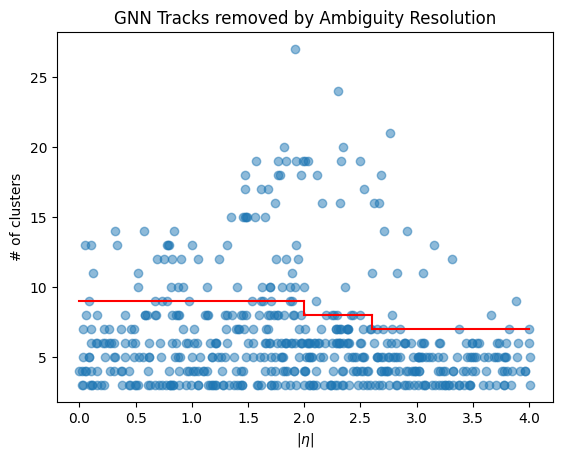

In [22]:
cluster_config = dict(bins=31, range=(-0.5, 30.5), alpha=0.5)
plt.title("GNN Tracks removed by Ambiguity Resolution")
plt.scatter(disjoints.abseta, disjoints.mot, alpha=0.5)
plt.plot([0, 2], [9, 9], color="red")
plt.plot([2, 2.6], [8, 8], color="red")
plt.plot([2.6, 4], [7, 7], color="red")
plt.plot([2, 2], [9, 8], color="red")
plt.plot([2.6, 2.6], [8, 7], color="red")
plt.xlabel(r"$|\eta|$")
plt.ylabel("# of clusters")

In [31]:
disjoints.pt.shape, disjoints.pt[disjoints.pt > 5000].shape

((537,), (22,))

(0.0, 5000.0)

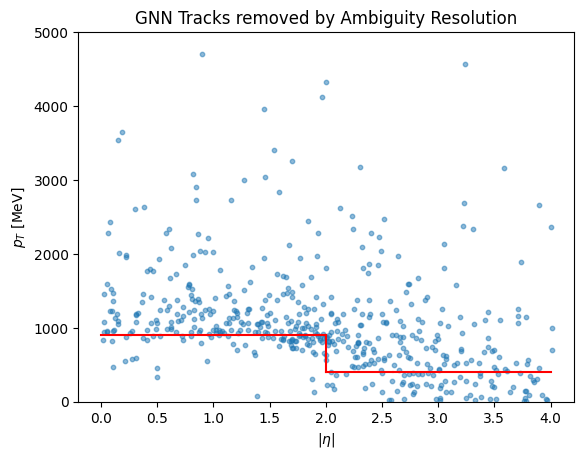

In [32]:
plt.title("GNN Tracks removed by Ambiguity Resolution")
config = dict(s=10.0, alpha=0.5)
plt.scatter(disjoints.abseta, disjoints.pt, **config)
plt.plot([0, 2], [900, 900], color="red")
plt.plot([2, 2.6], [400, 400], color="red")
plt.plot([2.6, 4], [400, 400], color="red")
plt.plot([2, 2], [900, 400], color="red")
plt.plot([2.6, 2.6], [400, 400], color="red")
plt.xlabel(r"$|\eta|$")
plt.ylabel(r"$p_T$ [MeV]")
plt.ylim(0, 5000)

In [27]:
disjoints.pt

0        656.889221
1        507.779755
2        700.563599
3       1806.590210
4        416.340820
           ...     
1953    1379.718018
1960    3033.358154
1961    7772.915527
1989    1485.713135
1999     435.629913
Name: pt, Length: 537, dtype: float32

In [19]:
vars(gnn_reader).keys()

dict_keys(['inputdir', 'outdir', 'name', 'overwrite', 'all_evtids', 'nevts', 'particles', 'clusters', 'spacepoints', 'truth', 'true_edges', 'tracks_clusters', 'tracks', 'true_tracks', 'detailed_matching', 'tracks_matched_to_truth'])

### Compare GNN with two fits vs. with Ambuiguity Processor

In [4]:
gnn_twofits_basedir = "/media/DataOcean/projects/tracking/integrateToAthena/run_21.9.26/RunOneEventForDebuging/GNN_withRemoval_twoFits"
gnn_twofits = AthenaRawDataReader(gnn_twofits_basedir, overwrite=False, name="GNN with Two Fits")
gnn_twofits.read(evtid)

Total 1 events in directory: /media/DataOcean/projects/tracking/integrateToAthena/run_21.9.26/RunOneEventForDebuging/GNN_withRemoval_twoFits


True

In [6]:
gnn_cmp_2fits_ambig = TrackAlgComparator(gnn_twofits, gnn_withAmbig_reader, min_reco_clusters=0)

1953 GNN with Two Fits tracks compared to 1474 GNN with Ambiguity Resolution tracks.
Require min_num_clusters = 0 only for GNN with Two Fits tracks.
Total # of GNN with Two Fits tracks: 1953. After filtering, # of GNN with Two Fits tracks: 1953 (100.000%)
Matched: 1471, 1953, 0.7532
GNN with Two Fits is a subset: 0, 1953, 0.0000
GNN with Ambiguity Resolution is a subset: 1, 1953, 0.0005
Disjoint:  480, 1953, 0.2458


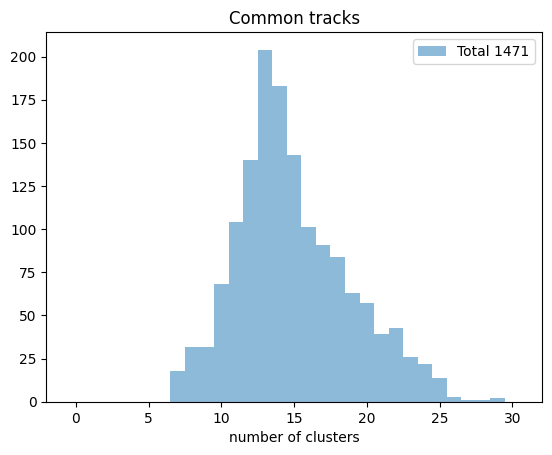

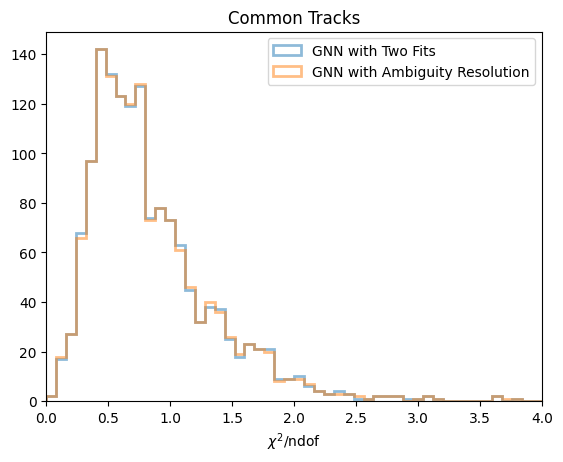

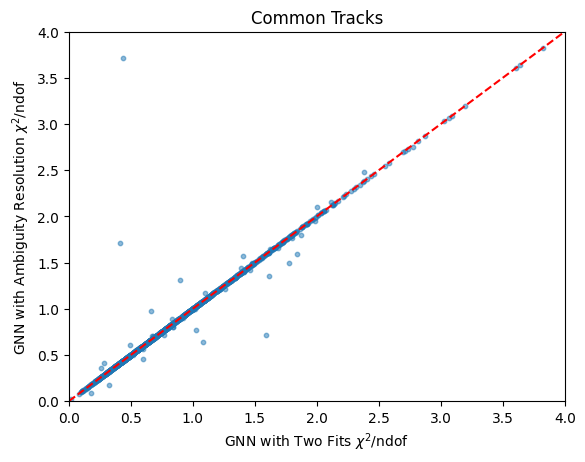

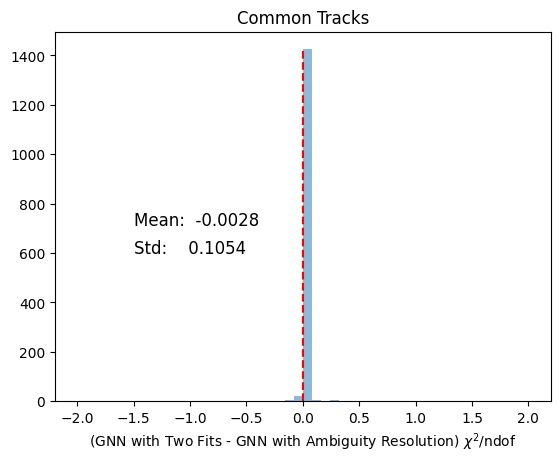

In [7]:
_ = gnn_cmp_2fits_ambig.plot_common_tracks()

In [10]:
gnn_cmp_2fits_CKF = TrackAlgComparator(gnn_twofits, ckf_reader, min_reco_clusters=0)

1953 GNN with Two Fits tracks compared to 2077 CKF tracks.
Require min_num_clusters = 0 only for GNN with Two Fits tracks.
Total # of GNN with Two Fits tracks: 1953. After filtering, # of GNN with Two Fits tracks: 1953 (100.000%)
Matched: 771, 1953, 0.3948
GNN with Two Fits is a subset: 466, 1953, 0.2386
CKF is a subset: 183, 1953, 0.0937
Disjoint:  365, 1953, 0.1869


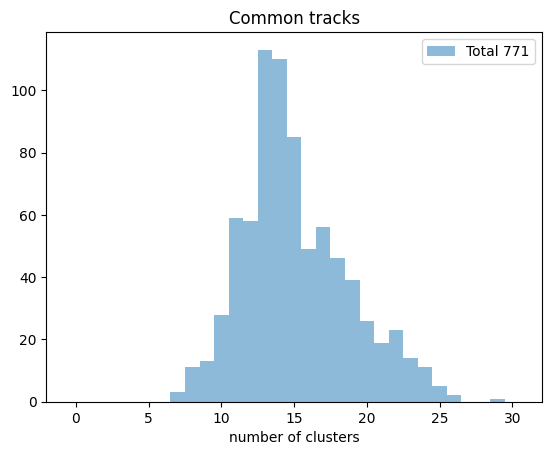

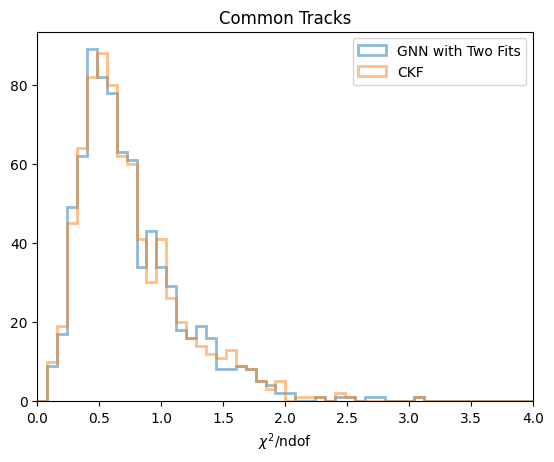

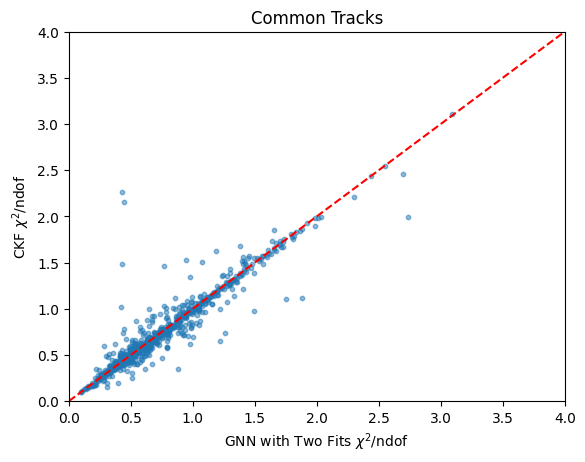

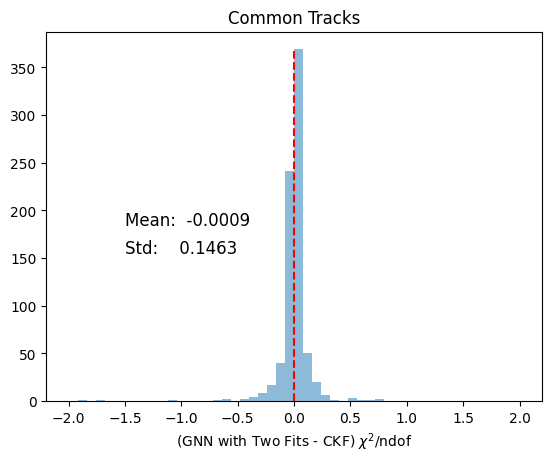

In [11]:
_ = gnn_cmp_2fits_CKF.plot_common_tracks()

All matched to truth GNN with Two Fits:  1844 2211 0.8340117593848937
All matched to truth CKF:  1876 2442 0.7682227682227682
2077 CKF tracks compared to 1953 GNN with Two Fits tracks.
Require min_num_clusters = 0 only for CKF tracks.
Total # of CKF tracks: 2077. After filtering, # of CKF tracks: 2077 (100.000%)
Matched: 771, 2077, 0.3712
CKF is a subset: 183, 2077, 0.0881
GNN with Two Fits is a subset: 449, 2077, 0.2162
Disjoint:  509, 2077, 0.2451
1953 GNN with Two Fits tracks compared to 2077 CKF tracks.
Require min_num_clusters = 0 only for GNN with Two Fits tracks.
Total # of GNN with Two Fits tracks: 1953. After filtering, # of GNN with Two Fits tracks: 1953 (100.000%)
Matched: 771, 1953, 0.3948
GNN with Two Fits is a subset: 466, 1953, 0.2386
CKF is a subset: 183, 1953, 0.0937
Disjoint:  365, 1953, 0.1869


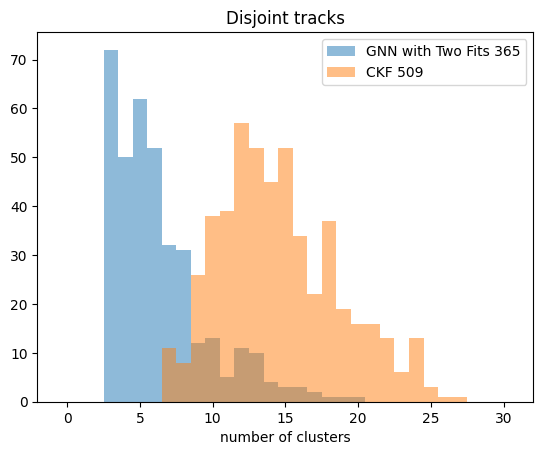

Number of good disjoint GNN with Two Fits tracks: 302 / 365
Number of good disjoint CKF tracks: 433 / 509


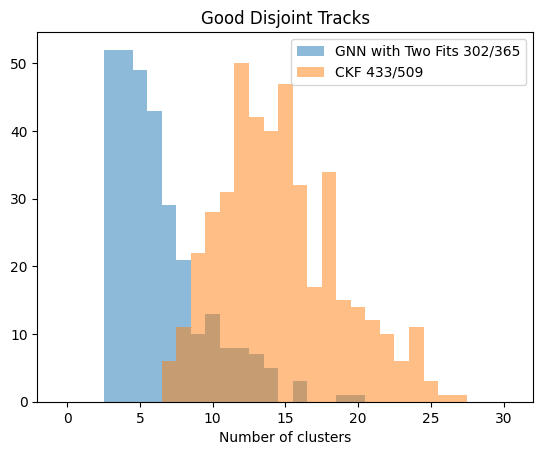

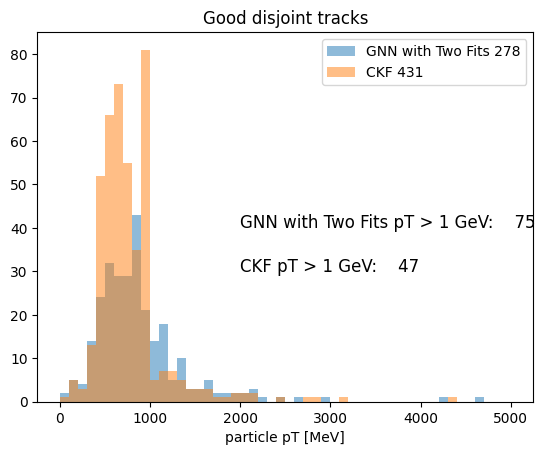

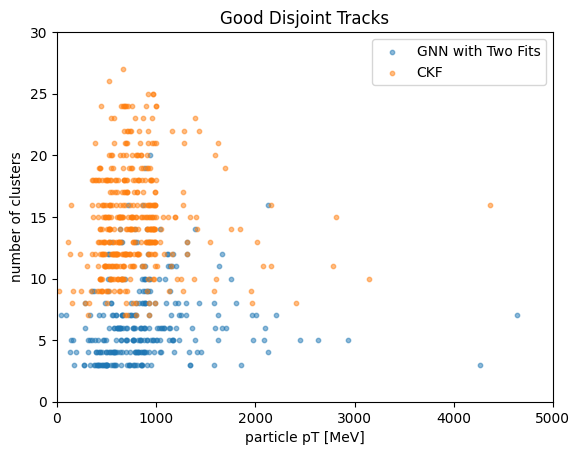

In [12]:
_ = gnn_cmp_2fits_CKF.plot_disjoint_tracks()

### GNN with removal vs. GNN with Ambiguity Processor

In [103]:
gnn_withOR_base_dir = "/media/DataOcean/projects/tracking/integrateToAthena/run_21.9.26/RunOneEventForDebuging/GNN_withRemoval"
gnn_withOR_reader = AthenaRawDataReader(gnn_withOR_base_dir, overwrite=False, name="GNN with Outlier Removal")
gnn_withOR_reader.read(evtid)

Total 1 events in directory: /media/DataOcean/projects/tracking/integrateToAthena/run_21.9.26/RunOneEventForDebuging/GNN_withRemoval


True

In [104]:
gnn_OR_vs_ambig = TrackAlgComparator(gnn_withOR_reader, gnn_withAmbig_reader)

1969 GNN with Outlier Removal tracks compared to 1474 GNN with Ambiguity Resolution tracks.
Require min_num_clusters = 5 only for GNN with Outlier Removal tracks.
Total # of GNN with Outlier Removal tracks: 1969. After filtering, # of GNN with Outlier Removal tracks: 1804 (91.620%)
Matched: 1472, 1804, 0.8160
GNN with Outlier Removal is a subset: 0, 1804, 0.0000
GNN with Ambiguity Resolution is a subset: 1, 1804, 0.0006
Disjoint:  330, 1804, 0.1829


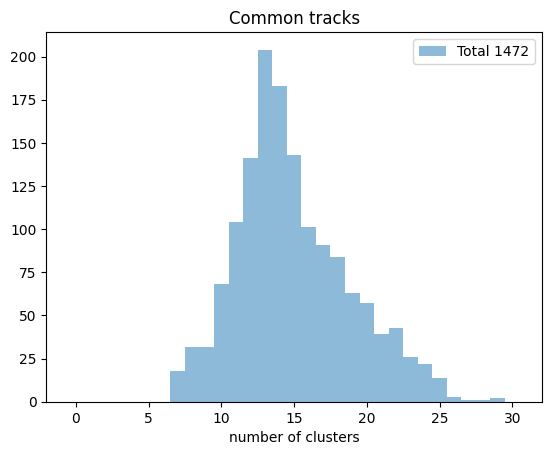

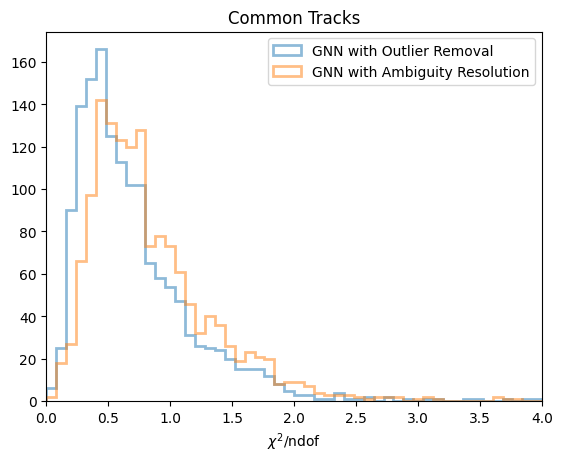

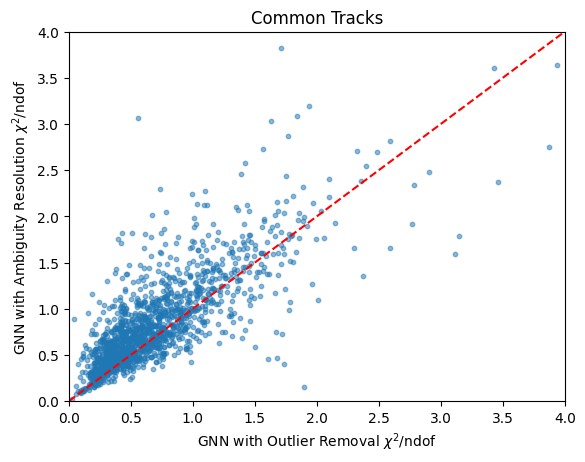

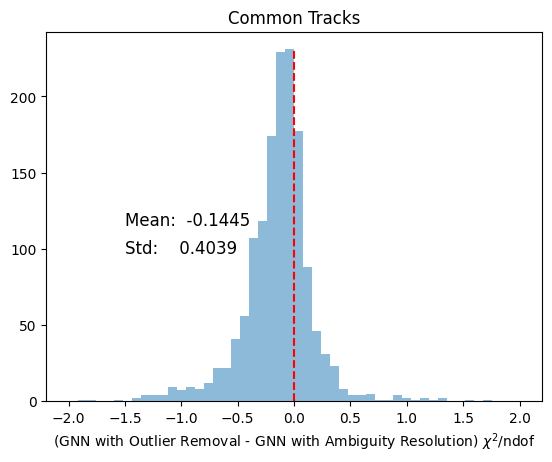

(array([1.0892846 , 0.45825191, 0.63141727, ..., 0.53034782, 0.26666905,
        0.67329048]),
 array([0.82231536, 0.42804573, 0.58699456, ..., 0.66410869, 0.35759619,
        1.0724619 ]))

In [105]:
_ = gnn_OR_vs_ambig.plot_common_tracks()

### Compare GNN with Ambiguity Processor with CKF

In [26]:
gnn_withAmbig_compare_CKF = TrackAlgComparator(gnn_withAmbig_reader, ckf_reader)

### Common Tracks

1474 GNN with Ambiguity Resolution tracks compared to 2077 CKF tracks.
Require min_num_clusters = 5 only for GNN with Ambiguity Resolution tracks.
Total # of GNN with Ambiguity Resolution tracks: 1474. After filtering, # of GNN with Ambiguity Resolution tracks: 1474 (100.000%)
Matched: 771, 1474, 0.5231
GNN with Ambiguity Resolution is a subset: 331, 1474, 0.2246
CKF is a subset: 183, 1474, 0.1242
Disjoint:  53, 1474, 0.0360


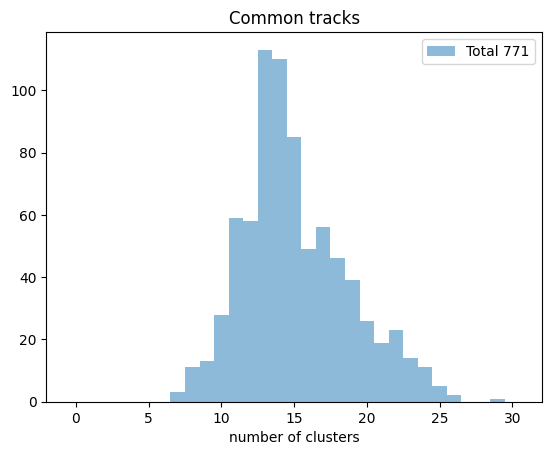

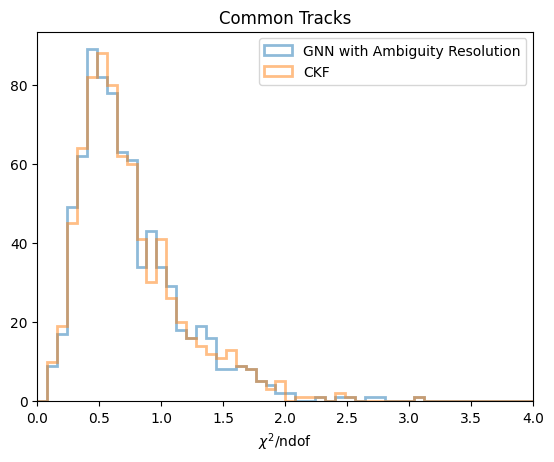

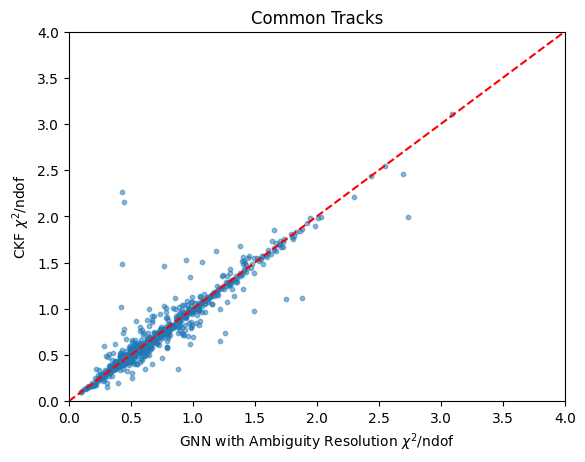

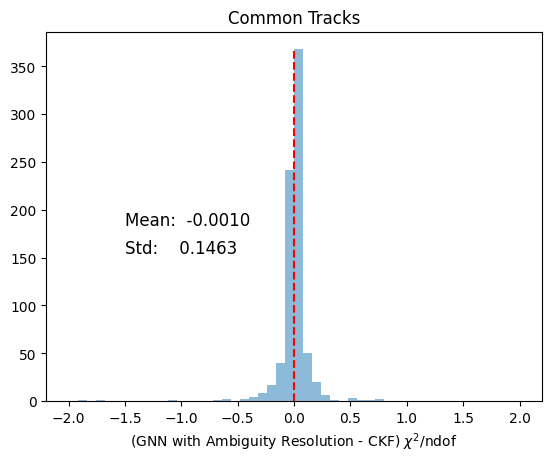

In [27]:
_ = gnn_withAmbig_compare_CKF.plot_common_tracks()

### Disjoint Tracks

All matched to truth GNN with Ambiguity Resolution:  1430 1612 0.8870967741935484
All matched to truth CKF:  1876 2442 0.7682227682227682
2077 CKF tracks compared to 1474 GNN with Ambiguity Resolution tracks.
Require min_num_clusters = 5 only for CKF tracks.
Total # of CKF tracks: 2077. After filtering, # of CKF tracks: 2077 (100.000%)
Matched: 771, 2077, 0.3712
CKF is a subset: 183, 2077, 0.0881
GNN with Ambiguity Resolution is a subset: 330, 2077, 0.1589
Disjoint:  653, 2077, 0.3144
1474 GNN with Ambiguity Resolution tracks compared to 2077 CKF tracks.
Require min_num_clusters = 5 only for GNN with Ambiguity Resolution tracks.
Total # of GNN with Ambiguity Resolution tracks: 1474. After filtering, # of GNN with Ambiguity Resolution tracks: 1474 (100.000%)
Matched: 771, 1474, 0.5231
GNN with Ambiguity Resolution is a subset: 331, 1474, 0.2246
CKF is a subset: 183, 1474, 0.1242
Disjoint:  53, 1474, 0.0360


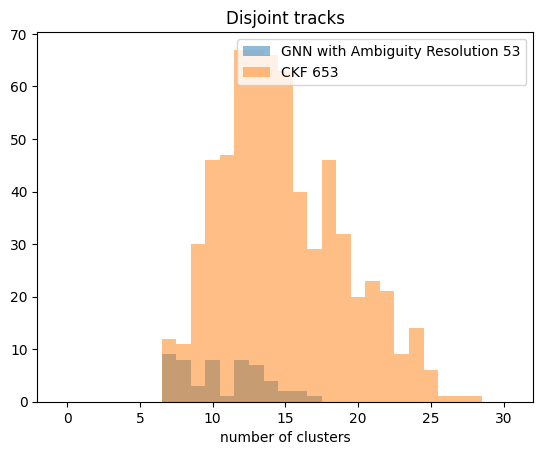

Number of good disjoint GNN with Ambiguity Resolution tracks: 48 / 53
Number of good disjoint CKF tracks: 552 / 653


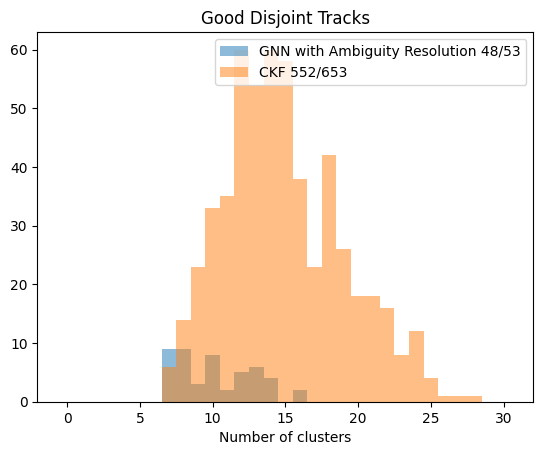

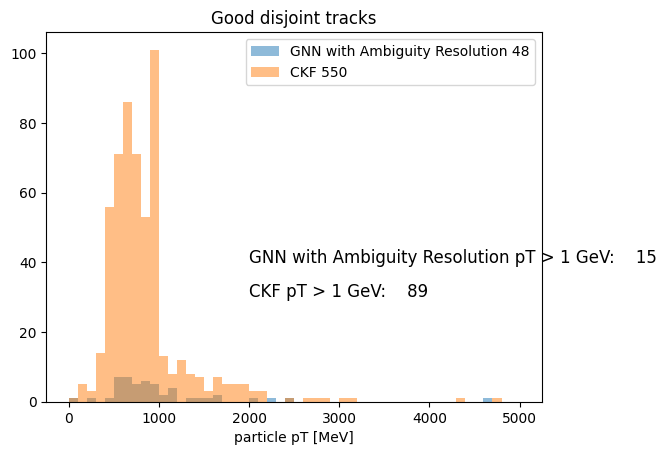

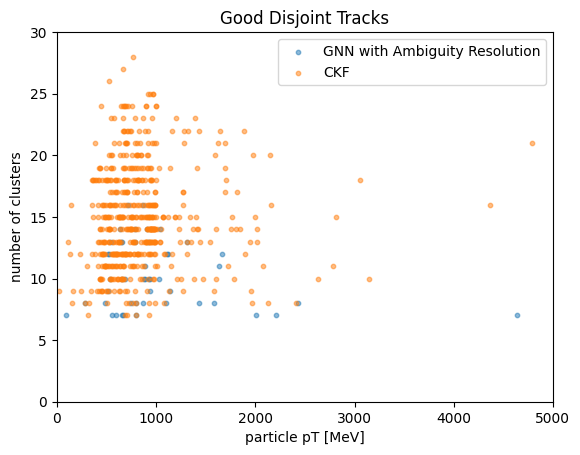

In [28]:
_ = gnn_withAmbig_compare_CKF.plot_disjoint_tracks()

# Compare CKF with GNN with outlier removal

In [4]:
gnn_OR_base_dir = "/media/DataOcean/projects/tracking/integrateToAthena/run_21.9.26/RunOneEventForDebuging/GNN_withRemoval"
gnn_OR_reader = AthenaRawDataReader(gnn_OR_base_dir, overwrite=False, name="GNN with OR")
gnn_OR_reader.read(event_number=event_number)

Total 1 events in directory: /media/DataOcean/projects/tracking/integrateToAthena/run_21.9.26/RunOneEventForDebuging/GNN_withRemoval


In [6]:
compare_gnn_OR_ckf = TrackAlgComparator(gnn_OR_reader, ckf_reader)

1969 GNN with OR tracks compared to 2077 CKF tracks.
Require min_num_clusters = 5 only for GNN with OR tracks.
Total # of GNN with OR tracks: 1969. After filtering, # of GNN with OR tracks: 1804 (91.620%)
Matched: 771, 1804, 0.4274
GNN with OR is a subset: 428, 1804, 0.2373
CKF is a subset: 189, 1804, 0.1048
Disjoint:  250, 1804, 0.1386


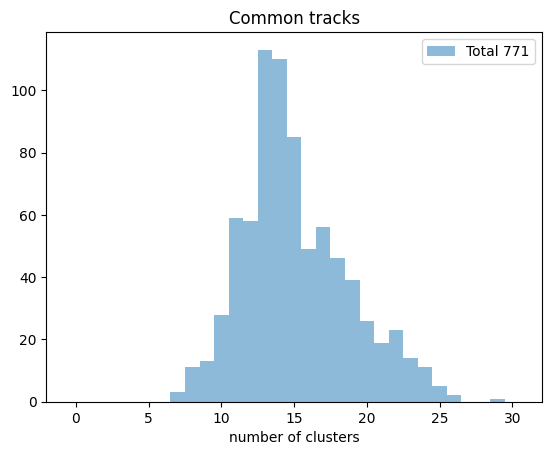

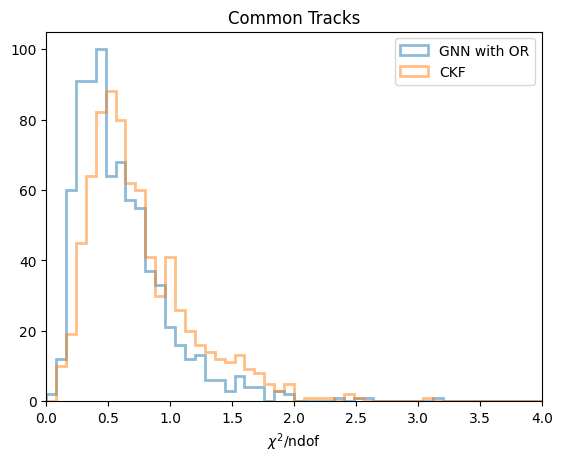

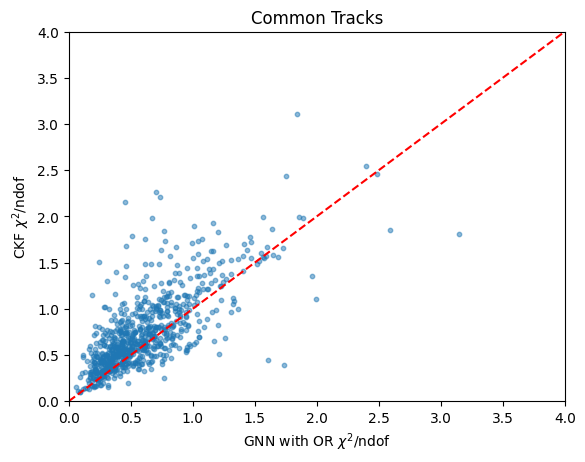

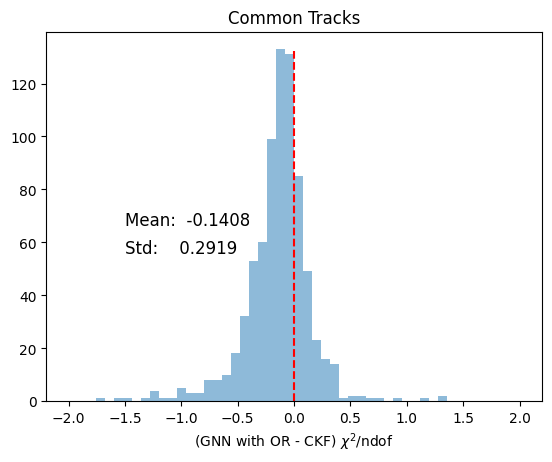

In [7]:
_ = compare_gnn_OR_ckf.plot_common_tracks()